In [1]:
import re
import sys
from pyspark import SparkConf, SparkContext
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
conf = SparkConf()
sc = SparkContext(conf=conf)

In [23]:
data_m = np.matrix(np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q2/data/data.txt"), dtype = float)
c1_m = np.matrix(np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q2/data/c1.txt"), dtype = float)
c2_m = np.matrix(np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q2/data/c2.txt"), dtype = float)

In [24]:
MAX_ITER = 20
cost_euclid_list_c1 = list()
cost_euclid_list_c2 = list()

for n in range(MAX_ITER):
    cost_euclid_c1 = 0
    cost_euclid_c2 = 0
    cluster_list_c1 = list()
    cluster_list_c2 = list()
    
    for i in range(len(data_m)):
        distance_c1 = float("inf")
        distance_c2 = float("inf")
        
        for j in range(len(c1_m)):
            if np.sqrt(np.square(data_m[i]-c1_m[j]).sum()) <= distance_c1:
                distance_c1 = np.sqrt(np.square(data_m[i]-c1_m[j]).sum())
                c1_index = j
            if np.sqrt(np.square(data_m[i]-c2_m[j]).sum()) <= distance_c2:
                distance_c2 = np.sqrt(np.square(data_m[i]-c2_m[j]).sum())
                c2_index = j
        
        cost_euclid_c1 += distance_c1
        cost_euclid_c2 += distance_c2
        cluster_list_c1.append((c1_index, i))
        cluster_list_c2.append((c2_index, i))
    
    cluster_listc1_rdd = sc.parallelize(cluster_list_c1)
    cluster_listc2_rdd = sc.parallelize(cluster_list_c2)
    
    c1_index = cluster_listc1_rdd.groupByKey().mapValues(list).collect()
    c2_index = cluster_listc2_rdd.groupByKey().mapValues(list).collect()
    
    for k in range(10):
        c1_m[k] = np.mean(data_m[c1_index[k][1]], axis=0)
        c2_m[k] = np.mean(data_m[c2_index[k][1]], axis=0)
        
    cost_euclid_list_c1.append((n + 1, cost_euclid_c1))
    cost_euclid_list_c2.append((n + 1, cost_euclid_c2))

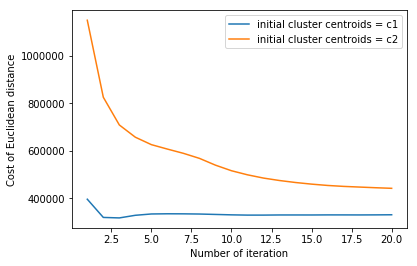

In [25]:
plt.plot(*zip(*cost_euclid_list_c1), label='initial cluster centroids = c1')
plt.plot(*zip(*cost_euclid_list_c2), label='initial cluster centroids = c2')
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Cost of Euclidean distance")
plt.show()

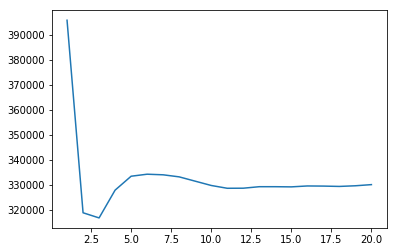

In [7]:
plt.plot(*zip(*cost_euclid_list_c1))
plt.show()

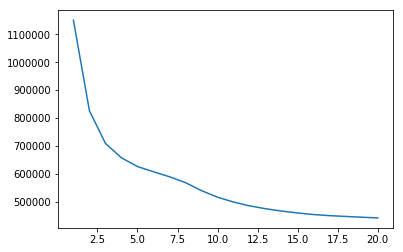

In [8]:
plt.plot(*zip(*cost_euclid_list_c2))
plt.show()

In [18]:
improve_c1 = abs(cost_euclid_list_c1[9][1] - cost_euclid_list_c1[0][1])/cost_euclid_list_c1[9][1]
improve_c2 = abs(cost_euclid_list_c2[9][1] - cost_euclid_list_c2[0][1])/cost_euclid_list_c2[9][1]

In [20]:
print(improve_c1, improve_c2)

0.19982194122029703 1.2301205509424282
